## Dog Breed Prediction

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from tqdm import tqdm
from keras.utils import load_img, img_to_array
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import Adam


#### Get Dataset form Kaggle

In [ ]:
# Download Dataset
!mkdir dataset
%cd dataset
!kaggle datasets download catherinehorng/dogbreedidfromcomp


In [3]:
# Unzip Dataset
!tar -xf dogbreedidfromcomp.zip


In [ ]:
# Delete Unwanted Files
!del dogbreedidfromcomp.zip
!del sample_submission.csv
%cd ..


#### Load data into pandas dataframe

In [5]:
labels = pd.read_csv('dataset/labels.csv')
print(labels.shape)
labels.head()


(10222, 2)


,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


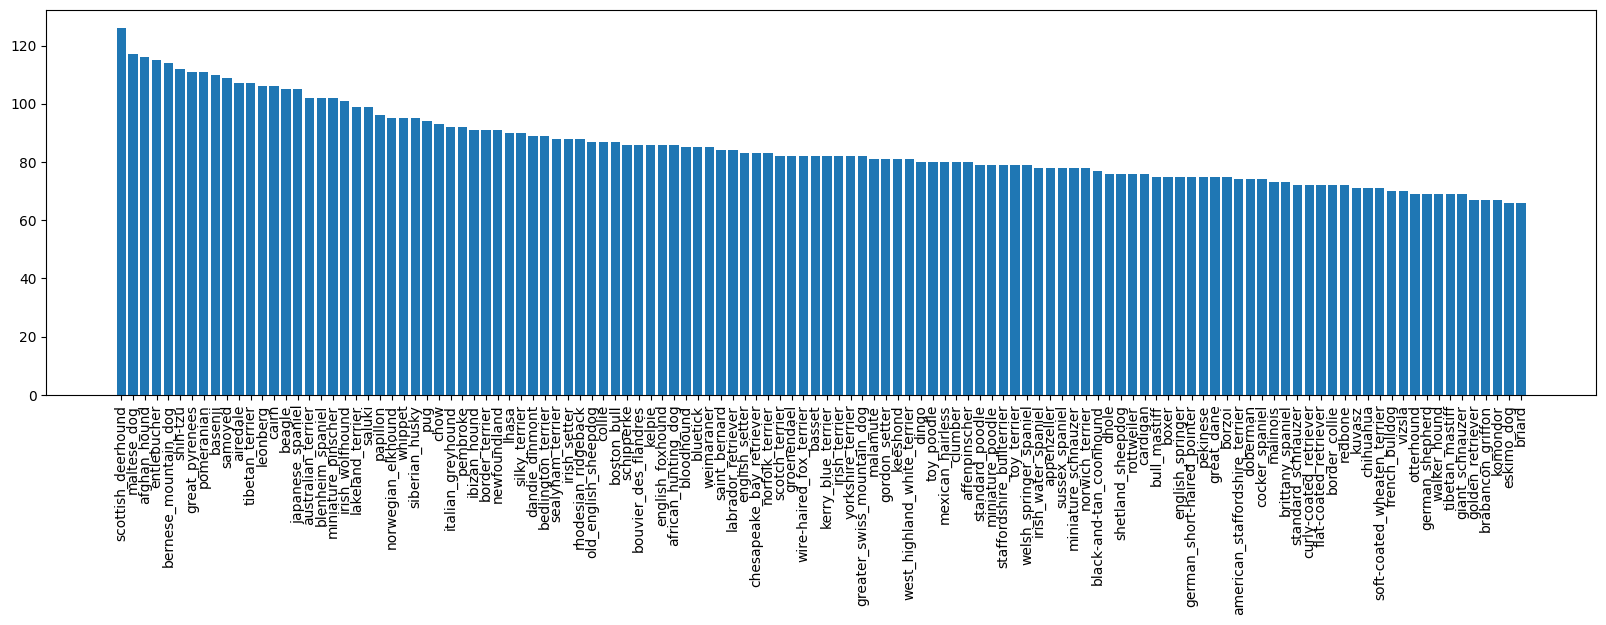

In [6]:
# Vizualize count of each breed
data = labels['breed'].value_counts()
fig, ax = plt.subplots(figsize=(20, 5))
ax.bar(data.index, data)
ax.tick_params(axis='x', labelrotation=90)


#### Creating Data

In [7]:
# Selecting first 3 breeds (Limitation due to computation power)
CLASS_NAMES = ['scottish_deerhound', 'maltese_dog', 'afghan_hound']
labels = labels[(labels['breed'].isin(CLASS_NAMES))]
labels = labels.reset_index()
labels.head()


,index,id,breed
0,9,0042188c895a2f14ef64a918ed9c7b64,scottish_deerhound
1,12,00693b8bc2470375cc744a6391d397ec,maltese_dog
2,79,01e787576c003930f96c966f9c3e1d44,scottish_deerhound
3,90,022b34fd8734b39995a9f38a4f3e7b6b,maltese_dog
4,146,0379145880ad3978f9b80f0dc2c03fba,afghan_hound


In [8]:
# Creating X_data
X_data = np.zeros((len(labels), 224, 224, 3), dtype='float32')

for i in tqdm(range(len(labels))):
    img = load_img('dataset/train/%s.jpg' %
                   labels['id'][i], target_size=(224, 224))
    img = img_to_array(img)
    X_data[i] = img/255.0


100%|██████████| 359/359 [00:01<00:00, 231.89it/s]


In [9]:
# Creating Y_data
Y_data = label_binarize(labels['breed'], classes=CLASS_NAMES)


In [10]:
print(f'Train Images shape: {X_data.shape}, size: {X_data.size:,}')
print(f'One-hot encoded output shape: {Y_data.shape}, size: {Y_data.size:,}')


Train Images shape: (359, 224, 224, 3), size: 54,039,552
One-hot encoded output shape: (359, 3), size: 1,077


In [11]:
# Splitting the data set into training and testing data sets
X_train, X_test, Y_train, Y_test = train_test_split(
    X_data, Y_data, test_size=0.1)

# Splitting the training data set into training and validation data sets
X_train, X_val, Y_train, Y_val = train_test_split(
    X_train, Y_train, test_size=0.2)


#### Modelling

In [12]:
# Building the Model
model = Sequential()

model.add(Conv2D(filters=64, kernel_size=(4, 4),
          activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=32, kernel_size=(4, 4),
          activation='relu', kernel_regularizer='l2'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=16, kernel_size=(4, 4),
          activation='relu', kernel_regularizer='l2'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=8, kernel_size=(4, 4),
          activation='relu', kernel_regularizer='l2'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation="relu", kernel_regularizer='l2'))
model.add(Dense(64, activation="relu", kernel_regularizer='l2'))
model.add(Dense(len(CLASS_NAMES), activation="softmax"))

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(0.0001), metrics=['accuracy'])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 221, 221, 64)      3136      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 107, 107, 32)      32800     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 50, 50, 16)        8208      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 25, 25, 16)       0

In [13]:
# Training the model
epochs = 100
batch_size = 64

history = model.fit(X_train, Y_train, batch_size=batch_size,
                    epochs=epochs, validation_data=(X_val, Y_val))


Epoch 1/100
5/5 [==============================] - 5s 208ms/step - loss: 4.9570 - accuracy: 0.3178 - val_loss: 4.9114 - val_accuracy: 0.4000
Epoch 2/100
5/5 [==============================] - 1s 124ms/step - loss: 4.8903 - accuracy: 0.4109 - val_loss: 4.8575 - val_accuracy: 0.2615
Epoch 3/100
5/5 [==============================] - 1s 127ms/step - loss: 4.8320 - accuracy: 0.3682 - val_loss: 4.8035 - val_accuracy: 0.2769
Epoch 4/100
5/5 [==============================] - 1s 127ms/step - loss: 4.7747 - accuracy: 0.3682 - val_loss: 4.7456 - val_accuracy: 0.3077
Epoch 5/100
5/5 [==============================] - 1s 126ms/step - loss: 4.7152 - accuracy: 0.4186 - val_loss: 4.6927 - val_accuracy: 0.3077
Epoch 6/100
5/5 [==============================] - 1s 126ms/step - loss: 4.6565 - accuracy: 0.4264 - val_loss: 4.6458 - val_accuracy: 0.2923
Epoch 7/100
5/5 [==============================] - 1s 127ms/step - loss: 4.6004 - accuracy: 0.4496 - val_loss: 4.5999 - val_accuracy: 0.3077
Epoch 8/100
5

#### Model Evaluation

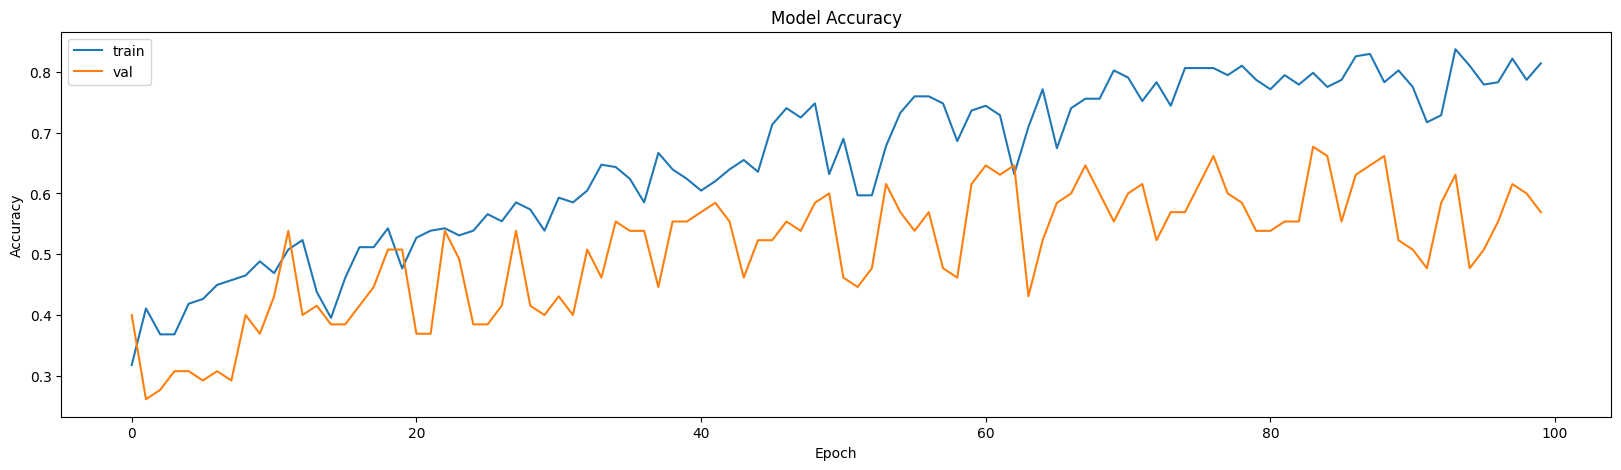

In [14]:
# Plot the training history
fig, ax = plt.subplots(figsize=(20, 5))
ax.set_title('Model Accuracy')
ax.set_xlabel('Epoch')
ax.set_ylabel('Accuracy')
ax.plot(history.history['accuracy'], label='train')
ax.plot(history.history['val_accuracy'], label='val')
_ = ax.legend()


In [15]:
# Model Accuracy on Test Data
Y_pred = model.predict(X_test)
score = model.evaluate(X_test, Y_test)
print('Accuracy over the test set: %1.0f%%' % round((score[1]*100), 2))


2/2 [==============================] - 0s 5ms/step - loss: 2.5494 - accuracy: 0.6111
Accuracy over the test set: 61%


In [16]:
model.save('model.h5')
